In [ ]:
## Evaluation Exercises

In [2]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import env
import wrangle
import split

## 1. Load your zillow dataset.

In [5]:
df = wrangle.wrangle_zillow()
df.shape

(2134889, 8)
(2096764, 8)


(2096764, 8)

In [4]:
# split
train, validate, test = split.train_validate_test_split(df, 'taxvaluedollarcnt')
train.shape, validate.shape, test.shape


((1174187, 8), (503224, 8), (419353, 8))

In [12]:
train.head(1)

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1913513,13955563,5.0,3.0,2420.0,562318.0,1973.0,6680.1,orange_county


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [33]:
X_train = pd.DataFrame(train.calculatedfinishedsquarefeet)
y_train = pd.DataFrame(train.taxvaluedollarcnt)

In [28]:
df = pd.DataFrame(train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']])
df.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt
1913513,2420.0,562318.0
1886619,1070.0,367613.0
318523,788.0,165892.0
1329325,1470.0,395000.0
682698,1218.0,696364.0


In [29]:
model = LinearRegression().fit(X_train, y_train)

In [30]:
predictions = model.predict(X_train)

## 3. Plot the residuals for the linear regression model that you made

In [34]:
df['baseline'] = df.taxvaluedollarcnt.mean()
df['predictions'] = model.predict(X_train)
df.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,predictions
1913513,2420.0,562318.0,409767.463229,573093.712744
1886619,1070.0,367613.0,409767.463229,217793.240731
318523,788.0,165892.0,409767.463229,143574.919910
1329325,1470.0,395000.0,409767.463229,323067.454661
682698,1218.0,696364.0,409767.463229,256744.699885


Text(0.5, 1.0, 'OLS linear model')

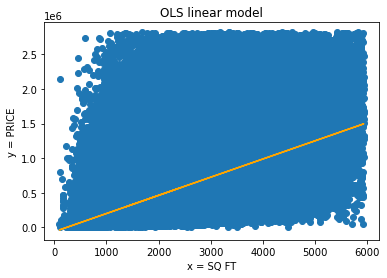

In [39]:
# visualize the line of best fit from OLS linear model
plt.scatter(df.calculatedfinishedsquarefeet, df.taxvaluedollarcnt)
plt.plot(df.calculatedfinishedsquarefeet, df.predictions, c='orange')
plt.xlabel('x = SQ FT')
plt.ylabel('y = PRICE')
plt.title('OLS linear model')

In [58]:
df['residual'] = df.taxvaluedollarcnt-df.predictions
df['baseline_resid'] = df.taxvaluedollarcnt-df.baseline
df.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,predictions,residual,baseline_resid
1913513,2420.0,562318.0,409767.463229,573093.712744,-10775.712744,152550.536771
1886619,1070.0,367613.0,409767.463229,217793.240731,149819.759269,-42154.463229
318523,788.0,165892.0,409767.463229,143574.919910,22317.080090,-243875.463229
1329325,1470.0,395000.0,409767.463229,323067.454661,71932.545339,-14767.463229
682698,1218.0,696364.0,409767.463229,256744.699885,439619.300115,286596.536771


## 4./5. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model and baseline.

In [41]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
MSE = mean_squared_error(df.taxvaluedollarcnt, df.predictions)
MSE_baseline = mean_squared_error(df.taxvaluedollarcnt, df.baseline)
print("MSE", MSE)
print("Baseline MSE", MSE_baseline)

MSE 79460556376.61165
Baseline MSE 120678915994.99362


In [42]:
# Standard Squared Error
SSE = MSE *len(df)
SSE_baseline = MSE_baseline * len(df)

print("SSE", SSE)
print("SSE baseline", SSE_baseline)

SSE 9.33015523101845e+16
SSE baseline 1.4169961433541357e+17


In [43]:
RMSE = mean_squared_error(df.taxvaluedollarcnt, df.predictions, squared=False)
RMSE_baseline = mean_squared_error(df.taxvaluedollarcnt, df.baseline, squared=False)

print("RMSE", RMSE)
print("RMSE baseline", RMSE_baseline)

RMSE 281887.4888614456
RMSE baseline 347388.7102296124


## 7. What is the amount of variance explained in your model?

In [56]:
# calculate R2 the easy way:
# r2 score = expected variance

from sklearn.metrics import r2_score

my_r2_score = r2_score(df.taxvaluedollarcnt, df.predictions)
print("My R2 Score (explained variance)", my_r2_score)

My R2 Score (explained variance) 0.3415539431932909


In [57]:
base_r2_score = r2_score(df.taxvaluedollarcnt, df.baseline)
print("base R2 Score (explained variance)", base_r2_score)

base R2 Score (explained variance) 0.0


## 8. Is your model better than the baseline model?

- Yes. 
    - My model has lower RMSE value (error in dollars)